In [26]:
# !pip install opencv-python
# !pip install face_recognition

In [27]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os

In [28]:
imagePaths = list(paths.list_images('/content/drive/MyDrive/datasets/musk'))
knownEncodings = []
knownNames = []

# Loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
  name = imagePath.split(os.path.sep)[-2]
  # dlib ordering (RGB)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,model='hog')
  encodings = face_recognition.face_encodings(rgb, boxes)

  for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

data = {"encodings": knownEncodings, "names": knownNames}
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

In [30]:
def recognize_faces_and_display(image):
    cascPathface = os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
    faceCascade = cv2.CascadeClassifier(cascPathface)
    data = pickle.loads(open('face_enc', 'rb').read())

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)

    encodings = face_recognition.face_encodings(rgb)
    names = []

    for encoding in encodings:
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"

        if True in matches:
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1
                name = max(counts, key=counts.get)

            names.append(name)

    for ((x, y, w, h), name) in zip(faces, names):
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    cv2_imshow(image)
    cv2.waitKey(0)

Saving 190515-xprize.png to 190515-xprize.png


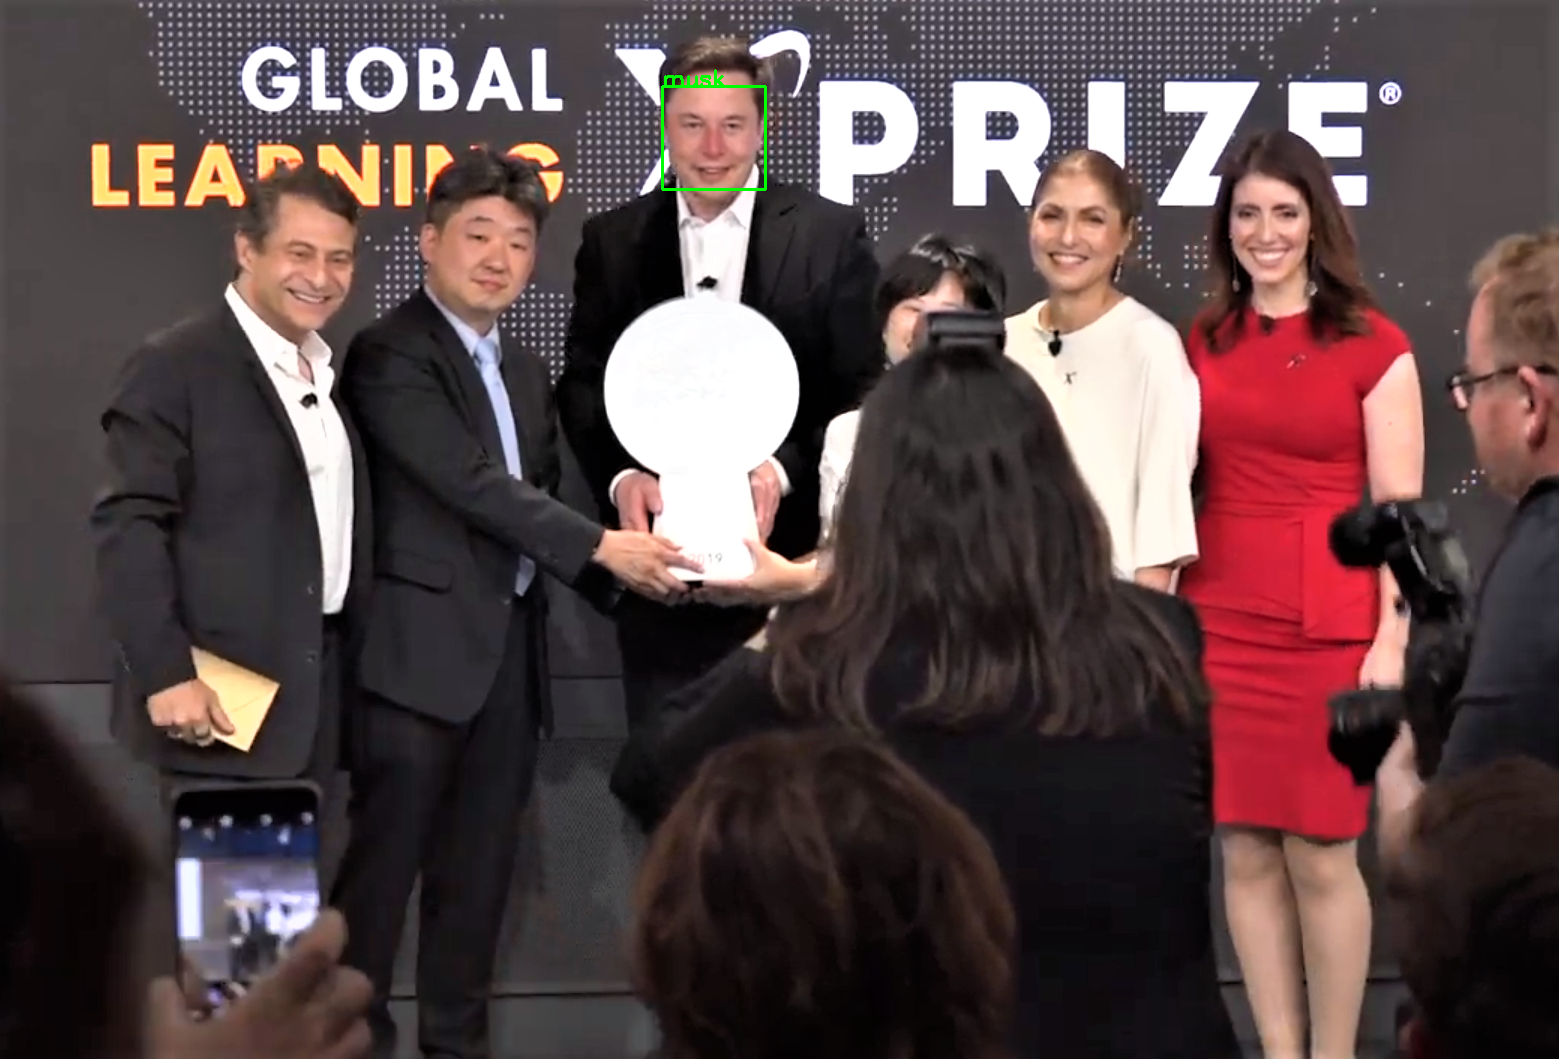

In [31]:
def upload_and_recognize():
    # Enable image upload in Colab
    uploaded = files.upload()

    # Process the uploaded image
    if len(uploaded) > 0:
        image_path = list(uploaded.keys())[0]
        image = cv2.imread(image_path)
        if image is not None:
            recognize_faces_and_display(image)
        else:
            print("Error: Unable to load the image.")

# Call the function to upload and recognize faces
upload_and_recognize()

Saving 16755519728234.jpg to 16755519728234.jpg


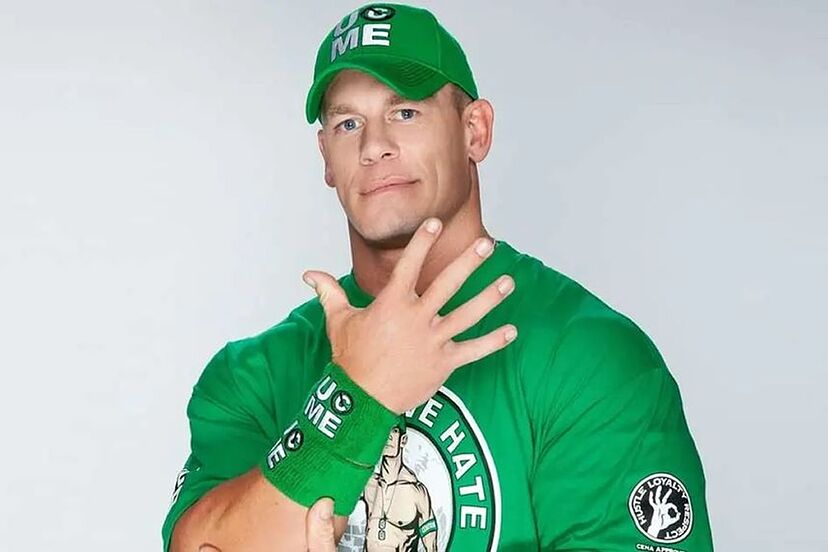

In [32]:
def upload_and_recognize():
    # Enable image upload in Colab
    uploaded = files.upload()

    # Process the uploaded image
    if len(uploaded) > 0:
        image_path = list(uploaded.keys())[0]
        image = cv2.imread(image_path)
        if image is not None:
            recognize_faces_and_display(image)
        else:
            print("Error: Unable to load the image.")

# Call the function to upload and recognize faces
upload_and_recognize()

Saving maxresdefault.jpg to maxresdefault.jpg


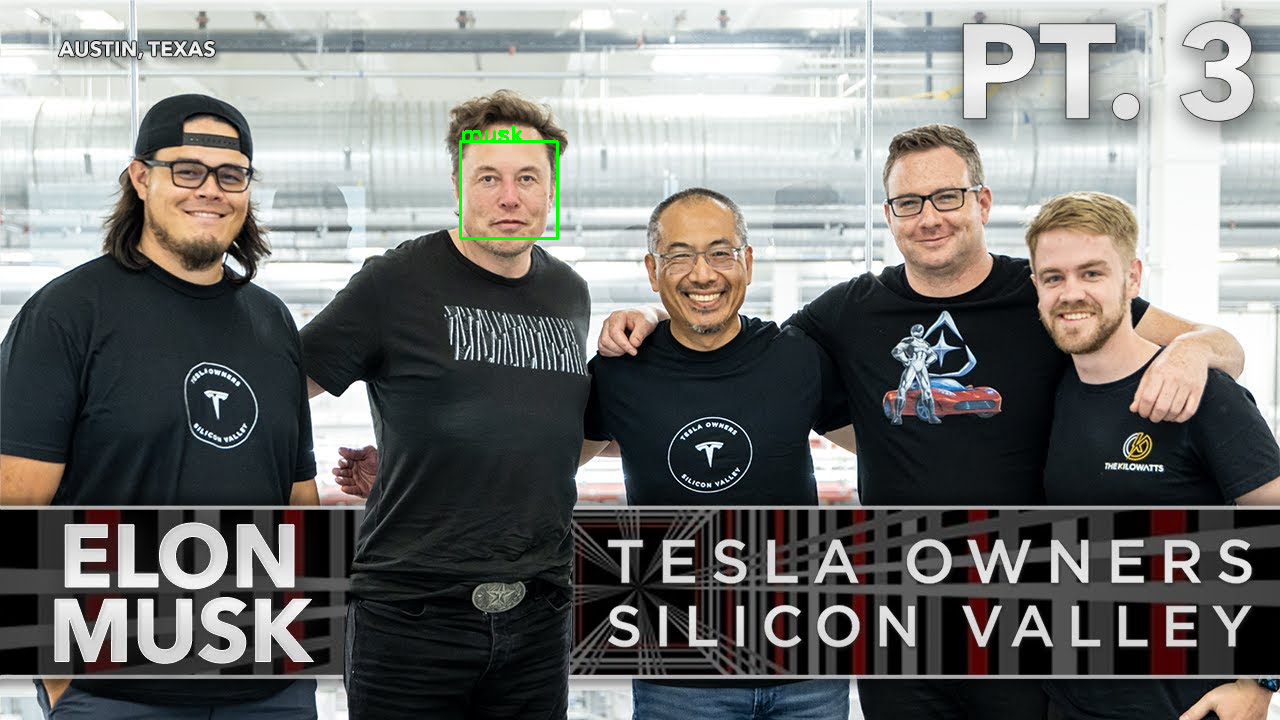

In [35]:
def upload_and_recognize():
    # Enable image upload in Colab
    uploaded = files.upload()

    # Process the uploaded image
    if len(uploaded) > 0:
        image_path = list(uploaded.keys())[0]
        image = cv2.imread(image_path)
        if image is not None:
            recognize_faces_and_display(image)
        else:
            print("Error: Unable to load the image.")

# Call the function to upload and recognize faces
upload_and_recognize()